# Linear Regression 

## Prepare data:
First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. 
Let us use the following function to generate our data by using Synthetic data


Synthetic data: It is a computer generated data that mimics the real data. So here the data is computer generated and not human generated
$$y = \frac{x}{2}+sin(x)+\epsilon$$ Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise.
    

In [2]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

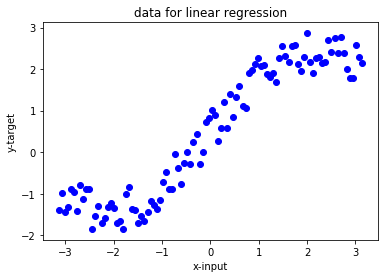

In [3]:
number_of_samples= 100

# we are plotting the graph from -pi to pi because we have sin(x). so in numpy we use -np.pi to np.pi for plotting the data on x-axis

x= np.linspace(-np.pi, np.pi, number_of_samples)
y= (0.5*x) + (np.sin(x)) + np.random.random(x.shape)

# plotting the values
plt.scatter (x,y, color= "blue")
plt.xlabel("x-input")
plt.ylabel("y-target")
plt.title("data for linear regression")
plt.show()

## Splitting data into train, test, validation sets
The training set is supposed to be used to train the model.

The model is evaluated on the validation set after every episode of training. 

The performance on the validation set gives a measure of how good the model generalizes.

Various hyperparameters of the model are tuned to improve performance on the validation set. Finally when the model is completely optimized and ready for deployment, it is evaluated on the test data and the performance is reported in the final description of the model.

In [9]:
random_indices= np.random.permutation(number_of_samples)

# Train- 70%
# test- 15% 
# val-15%

# Training set
x_train= x[random_indices[:70]]
y_train= y[random_indices[:70]]

# Test set
x_test= x[random_indices[70:85]]
y_test= y[random_indices[70:85]]

# Validation set
x_val= x[random_indices[85:]]
y_val= y[random_indices[85:]]

## Fitting the line to data
Linear regression learns to fit the hyperplane to our data in the features space.

For one dimensional data -> straight line

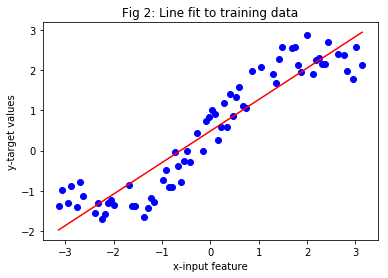

In [6]:
model = linear_model.LinearRegression()

# sklearn always takes the inputs as matrices. Hence we shape the arrays in one dimenson to a column matrix
x_train_for_fitting = np.matrix (x_train.reshape (len(x_train), 1))
y_train_for_fitting = np.matrix (y_train.reshape (len(y_train), 1))


# Fitting the line to the training data
model.fit (x_train_for_fitting, y_train_for_fitting)


# plotting the line
plt.scatter(x_train, y_train, color= "blue" )
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='red')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

## Evaluate the model
Now that we have our model ready, we must evaluate our model. In a linear regression scenario, its common to evaluate the model in terms of the mean squared error on the validation and test sets.

In [10]:
mean_val_error = np.mean((y_val- model.predict (x_val.reshape(len(x_val), 1))) **2 )
mean_test_error =np. mean((y_test - model.predict(x_test.reshape(len(x_test),1)))**2)

print ("Validation MSE: ", mean_val_error)
print ("Test MSE: ", mean_test_error)

Validation MSE:  3.54570200431
Test MSE:  4.85672788358
